# Credit_Card_Fraud_Detection

<b>This is a simulated credit card transaction dataset containing legitimate and fraud transactions from the duration 1st Jan 2019 - 31st Dec 2020. It covers credit cards of 1000 customers doing transactions with a pool of 800 merchants.

### Overview:-</b>

- <b> Dataset Type:- </b> Simulated credit card transaction data.<br>
- <b>Duration:-</b> 1st January 2019 - 31st December 2020.<br>
- <b> Customers:-</b> 1000 credit card holders.<br>
- <b>Merchants:-</b> 800 merchants involved in transactions.<br>
- <b>Purpose:-</b> To identify and analyze legitimate and fraudulent transactions.<br>

<b>This dataset is useful for developing and testing fraud detection algorithms, providing insights into patterns of normal and fraudulent activity over two years.

<b>Dataset Link:-</b> https://www.kaggle.com/datasets/kartik2112/fraud-detection

### List of Features:- <br>

1. **Unnamed: 0** (Likely an internal index for the dataframe)<br>
2. **trans_date_trans_time** (Original format containing date and time combined)<br>
3. **cc_num** (Credit card number)<br>
4. **merchant** (Name of the merchant where the transaction occurred)<br>
5. **category** (Category of the transaction, e.g., grocery_pos, entertainment)<br>
6. **amt** (Transaction amount)<br>
7. **first** (Customer's first name)<br>
8. **last** (Customer's last name)<br>
9. **gender** (Customer's gender)<br>
10. **street** (Customer's street address)<br>
11. **city** (Customer's city)<br>
12. **state** (Customer's state)<br>
13. **zip** (Customer's zip code)<br>
14. **lat** (Latitude of the transaction location)<br>
15. **long** (Longitude of the transaction location)<br>
16. **city_pop** (Population of the customer's city)<br>
17. **job** (Customer's job title)<br>
18. **dob** (Customer's date of birth)<br>
19. **trans_num** (Unique transaction number)<br>
20. **unix_time** (Unix timestamp of the transaction)<br>
21. **merch_lat** (Merchant's latitude)<br>
22. **merch_long** (Merchant's longitude)<br>
23. **is_fraud** (Binary flag indicating whether the transaction is fraudulent (1) or legitimate (0))


## Importing necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import MarkerCluster
from sklearn.compose import ColumnTransformer
import folium
from folium.plugins import MarkerCluster
%matplotlib inline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, precision_score, recall_score, f1_score,accuracy_score
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE
from sklearn import metrics
from scipy import stats
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.utils import resample
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import xgboost as xgb
import tensorflow as tf
import pickle
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import warnings
warnings.filterwarnings('ignore')

In [2]:
#concatenating the two datasets
df = pd.read_csv(r"D:\Internship\Credit_Card_Fraud_Detection_System\New folder\Credit_data\fraudTrain.csv")

In [3]:
df.head()

Unnamed: 0 trans_date_trans_time            cc_num  \
0           0   2019-01-01 00:00:18  2703186189652095   
1           1   2019-01-01 00:00:44      630423337322   
2           2   2019-01-01 00:00:51    38859492057661   
3           3   2019-01-01 00:01:16  3534093764340240   
4           4   2019-01-01 00:03:06   375534208663984   

                             merchant       category     amt      first  \
0          fraud_Rippin, Kub and Mann       misc_net    4.97   Jennifer   
1     fraud_Heller, Gutmann and Zieme    grocery_pos  107.23  Stephanie   
2                fraud_Lind-Buckridge  entertainment  220.11     Edward   
3  fraud_Kutch, Hermiston and Farrell  gas_transport   45.00     Jeremy   
4                 fraud_Keeling-Crist       misc_pos   41.96      Tyler   

      last gender                        street  ...      lat      long  \
0    Banks      F                561 Perry Cove  ...  36.0788  -81.1781   
1     Gill      F  43039 Riley Greens Suite 393  ...  48.8878 -118.2105   
2  Sanchez      M      594 White Dale Suite 530  ...  42.1808 -112.2620   
3    White      M   9443 Cynthia Court Apt. 038  ...  46.2306 -112.1138   
4   Garcia      M              408 Bradley Rest  ...  38.4207  -79.4629   

   city_pop                                job         dob  \
0      3495          Psychologist, counselling  1988-03-09   
1       149  Special educational needs teacher  1978-06-21   
2      4154        Nature conservation officer  1962-01-19   
3      1939                    Patent attorney  1967-01-12   
4        99     Dance movement psychotherapist  1986-03-28   

                          trans_num   unix_time  merch_lat  merch_long  \
0  0b242abb623afc578575680df30655b9  1325376018  36.011293  -82.048315   
1  1f76529f8574734946361c461b024d99  1325376044  49.159047 -118.186462   
2  a1a22d70485983eac12b5b88dad1cf95  1325376051  43.150704 -112.154481   
3  6b849c168bdad6f867558c3793159a81  1325376076  47.034331 -112.561071   
4  a41d7549acf90789359a9aa5346dcb46  1325376186  38.674999  -78.632459   

   is_fraud  
0         0  
1         0  
2         0  
3         0  
4         0  

[5 rows x 23 columns]

## Data Preprocessing

In [4]:
df.shape

(1296675, 23)

The shape of your dataset is (1,296,675 rows and 23 columns)

In [56]:
# Gather basic information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1229385 entries, 0 to 1296674
Data columns (total 10 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   amt                 1229385 non-null  float64
 1   gender              1229385 non-null  float64
 2   is_fraud            1229385 non-null  float64
 3   merchant_encoded    1229385 non-null  float64
 4   category_encoded    1229385 non-null  float64
 5   job_encoded         1229385 non-null  float64
 6   state_encoded       1229385 non-null  float64
 7   birth_year          1229385 non-null  float64
 8   trans_date_unix     1229385 non-null  float64
 9   trans_time_seconds  1229385 non-null  float64
dtypes: float64(10)
memory usage: 103.2 MB


In [6]:
# Descriptive statistics
desc_stats = df.describe()

# Renaming index for better readability
desc_stats.index = ['Count', 'Mean', 'Std', 'Min', '25%', '50%', '75%', 'Max']

# Function to format large numbers in a more readable way
def format_large_numbers(num):
    if abs(num) >= 1e6:
        return f'{num/1e6:.2f}M'
    elif abs(num) >= 1e3:
        return f'{num/1e3:.2f}K'
    else:
        return f'{num:.2f}'

# Apply formatting to all numeric values
formatted_stats = desc_stats.applymap(lambda x: format_large_numbers(x) if isinstance(x, (int, float)) else x)

# Transpose the DataFrame for better readability in the final display
formatted_stats = formatted_stats.T

# For a better display in Jupyter Notebook
from IPython.display import display
display(formatted_stats)


Count              Mean                Std        Min  \
Unnamed: 0  1.30M           648.34K            374.32K       0.00   
cc_num      1.30M  417192042079.73M  1308806447000.24M  60416.21M   
amt         1.30M             70.35             160.32       1.00   
zip         1.30M            48.80K             26.89K      1.26K   
lat         1.30M             38.54               5.08      20.03   
long        1.30M            -90.23              13.76    -165.67   
city_pop    1.30M            88.82K            301.96K      23.00   
unix_time   1.30M          1349.24M             12.84M   1325.38M   
merch_lat   1.30M             38.54               5.11      19.03   
merch_long  1.30M            -90.23              13.77    -166.67   
is_fraud    1.30M              0.01               0.08       0.00   

                      25%             50%             75%                Max  
Unnamed: 0        324.17K         648.34K         972.51K              1.30M  
cc_num      180042946.49M  3521417320.84M  4642255475.29M  4992346398065.15M  
amt                  9.65           47.52           83.14             28.95K  
zip                26.24K          48.17K          72.04K             99.78K  
lat                 34.62           39.35           41.94              66.69  
long               -96.80          -87.48          -80.16             -67.95  
city_pop           743.00           2.46K          20.33K              2.91M  
unix_time        1338.75M        1349.25M        1359.39M           1371.82M  
merch_lat           34.73           39.37           41.96              67.51  
merch_long         -96.90          -87.44          -80.24             -66.95  
is_fraud             0.00            0.00            0.00               1.00

In [7]:
# Check for missing values
print("Missing values in each column:")
print(df.isnull().sum())
print()

Missing values in each column:
Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64



There are no missing values (NaN) in any of the columns.<br>
It suggests that the dataset is complete in terms of recorded information for each transaction.

In [8]:
df['dob'] = pd.to_datetime(df['dob'])
today = pd.to_datetime('today')
df['age'] = (today - df['dob']).dt.days / 365.25

# Create age bins
age_bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
age_labels = ['0-10', '10-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80-90', '90-100']
df['age_bin'] = pd.cut(df['age'], bins=age_bins, labels=age_labels, right=True, include_lowest=True)
df[['age','age_bin']]


age age_bin
0        36.251882   30-40
1        45.968515   40-50
2        62.387406   60-70
3        57.407255   50-60
4        38.201232   30-40
...            ...     ...
1296670  62.540726   60-70
1296671  44.495551   40-50
1296672  56.777550   50-60
1296673  43.808350   40-50
1296674  28.815880   20-30

[1296675 rows x 2 columns]

In [9]:
agg_data = df.groupby(['age_bin', 'is_fraud']).size().reset_index(name='count')

# Pivot the data to make it suitable for calculation
pivot_data = agg_data.pivot_table(index='age_bin', columns='is_fraud', values='count', fill_value=0)

# Calculate total counts and fraud percentage for each age bin
pivot_data['total'] = pivot_data.sum(axis=1)
pivot_data['fraud_percentage'] = (pivot_data[1] / pivot_data['total']) * 100

# Reset index to ensure age_bin becomes a column
pivot_data = pivot_data.reset_index()

# Verify the calculated percentages
print(pivot_data)

is_fraud age_bin         0       1     total  fraud_percentage
0           0-10       0.0     0.0       0.0               NaN
1          10-20    4935.0    34.0    4969.0          0.684242
2          20-30  118288.0   756.0  119044.0          0.635059
3          30-40  294430.0  1420.0  295850.0          0.479973
4          40-50  269361.0  1170.0  270531.0          0.432483
5          50-60  251331.0  1447.0  252778.0          0.572439
6          60-70  166388.0  1275.0  167663.0          0.760454
7          70-80   93625.0   566.0   94191.0          0.600907
8          80-90   54592.0   518.0   55110.0          0.939938
9         90-100   36219.0   320.0   36539.0          0.875777


## Exploratory Data Analysis (EDA)

### Transaction Categories

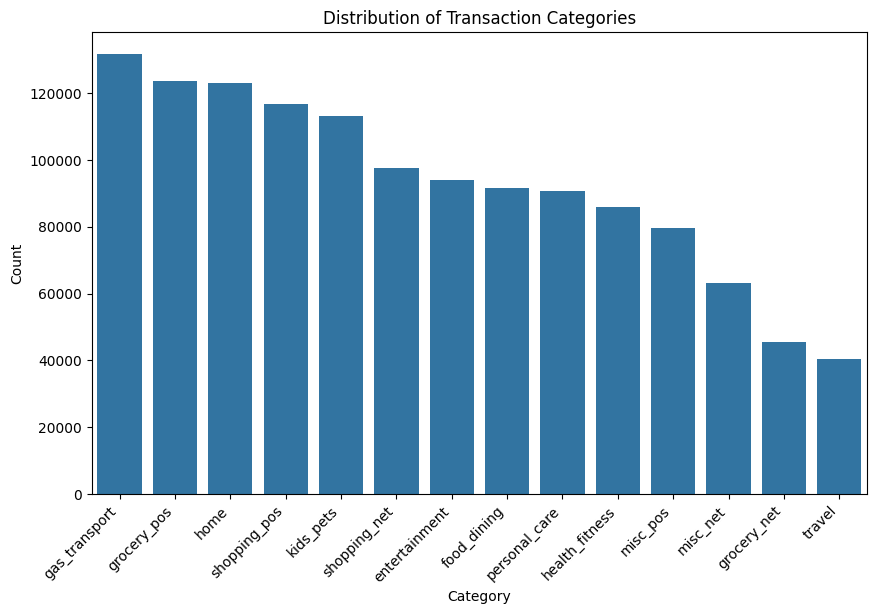

In [10]:
import seaborn as sns
# Bar plot of 'category' (Transaction Category)
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='category', order=df['category'].value_counts().index)
plt.title('Distribution of Transaction Categories')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

## Percentage of Fradulent transactions by Gender

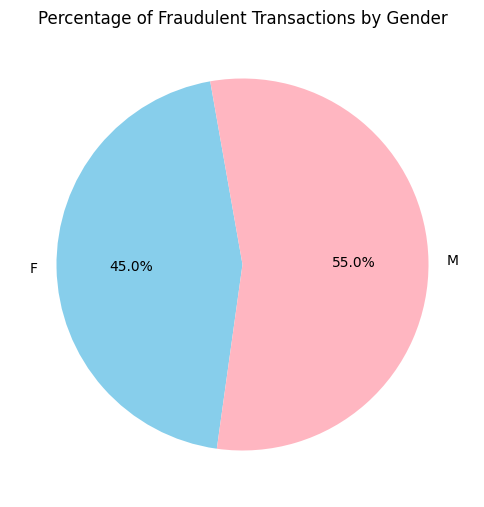

In [11]:
agg_data_gender = df.groupby(['gender', 'is_fraud']).size().reset_index(name='count')
total_fraud = agg_data_gender[agg_data_gender['is_fraud'] == 1].groupby('gender')['count'].sum()
total_transactions = df['gender'].value_counts()
fraud_percentage = (total_fraud / total_transactions) * 100

# Create pie chart
plt.figure(figsize=(6, 8))
fraud_percentage.plot.pie(autopct='%1.1f%%', startangle=100, colors=['skyblue', 'lightpink'])

plt.title('Percentage of Fraudulent Transactions by Gender')
plt.ylabel('')
plt.show()

## Percentage of fradulent transaction by Age

In [12]:
# # Create bar plot
# plt.figure(figsize=(14, 6))
# sns.barplot(x='age_bin', y='fraud_percentage', df=pivot_data, color='skyblue', edgecolor='black')

# plt.title('Percentage of Fraudulent Transactions by Age')
# plt.xlabel('Age Bin')
# plt.ylabel('Fraud Percentage')
# plt.xticks(rotation=45)
# plt.tight_layout()

# # Show the plot
# plt.show()

## Percentage of Fradulent Transactions by Category

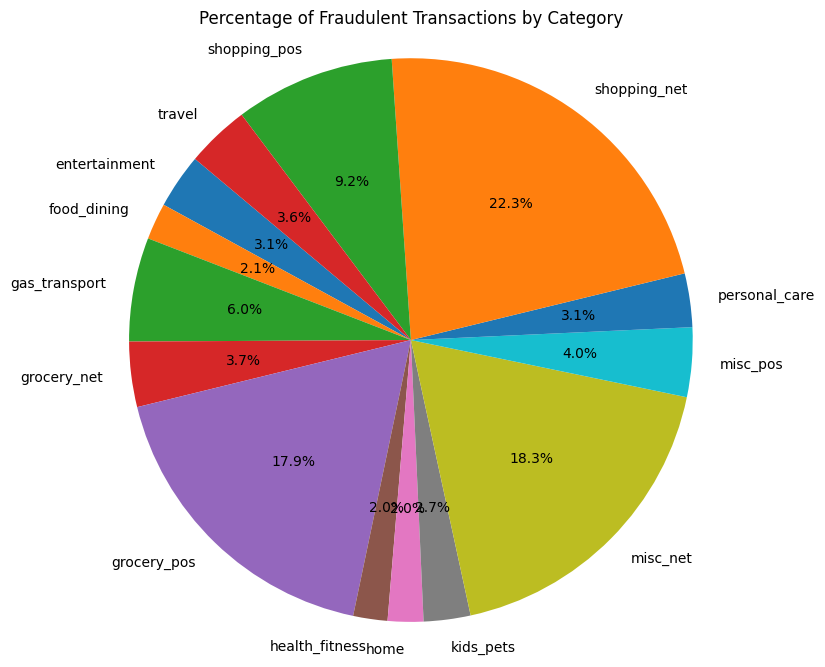

In [13]:
# Group the DataFrame by the category column and calculate the total number of transactions and fraudulent transactions for each category
transactions_by_category = df.groupby('category').size().reset_index(name='total_transactions')
fraudulent_transactions_by_category = df[df['is_fraud'] == 1].groupby('category').size().reset_index(name='fraudulent_transactions')

# Merge the two DataFrames on category
fraud_percentage_by_category = pd.merge(transactions_by_category, fraudulent_transactions_by_category, on='category', how='left')

# Calculate the percentage of fraudulent transactions for each category
fraud_percentage_by_category['fraud_percentage'] = (fraud_percentage_by_category['fraudulent_transactions'] / fraud_percentage_by_category['total_transactions']) * 100

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(fraud_percentage_by_category['fraud_percentage'], labels=fraud_percentage_by_category['category'], autopct='%1.1f%%', startangle=140)
plt.title('Percentage of Fraudulent Transactions by Category')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

## Percentage of Fradulent Transactions by Day

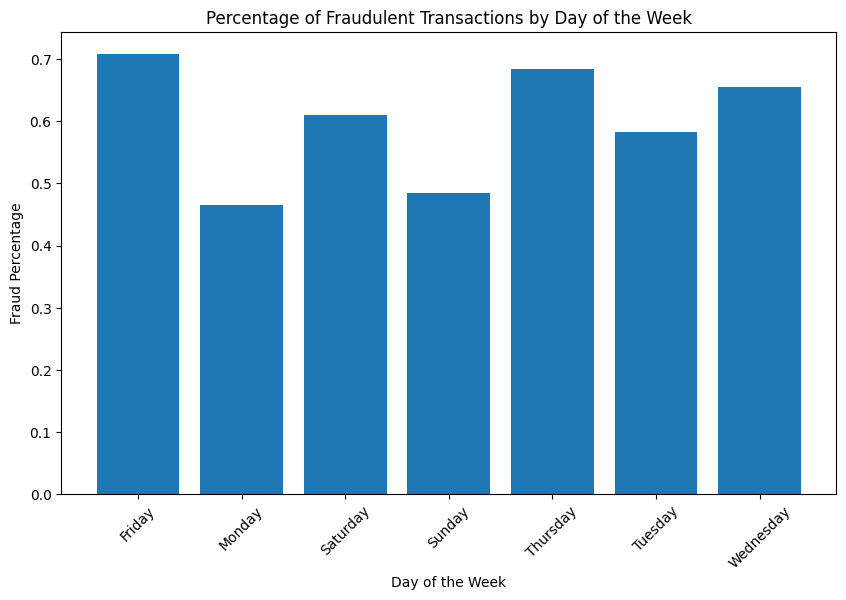

In [14]:
df['trans_date_trans_time']=pd.to_datetime(df['trans_date_trans_time'])
df['day_of_week'] = df['trans_date_trans_time'].dt.day_name()
transactions_by_day = df.groupby('day_of_week').size().reset_index(name='total_transactions')
fraudulent_transactions_by_day = df[df['is_fraud'] == 1].groupby('day_of_week').size().reset_index(name='fraudulent_transactions')
fraud_percentage_by_day = pd.merge(transactions_by_day, fraudulent_transactions_by_day, on='day_of_week', how='left')
fraud_percentage_by_day['fraud_percentage'] = (fraud_percentage_by_day['fraudulent_transactions'] / fraud_percentage_by_day['total_transactions']) * 100
plt.figure(figsize=(10, 6))
plt.bar(fraud_percentage_by_day['day_of_week'], fraud_percentage_by_day['fraud_percentage'])
plt.title('Percentage of Fraudulent Transactions by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Fraud Percentage')
plt.xticks(rotation=45)

plt.show()

In [15]:
import folium
from folium.plugins import MarkerCluster

map_center = [df['lat'].mean(), df['long'].mean()]
fraud_map = folium.Map(location=map_center, zoom_start=5)

# Create a MarkerCluster layer
marker_cluster = MarkerCluster().add_to(fraud_map)

# Add markers for each fraudulent transaction
for index, row in df.iterrows():
    if row['is_fraud'] == 1:
        folium.Marker([row['lat'], row['long']], popup='Fraudulent Transaction').add_to(marker_cluster)

# Calculate the count of fraudulent transactions
fraudulent_transactions_count = df[df['is_fraud'] == 1].shape[0]

# Add the count of fraudulent transactions to the map
folium.Marker([map_center[0], map_center[1]], popup='Fraudulent Transactions Count: {}'.format(fraudulent_transactions_count), icon=folium.Icon(color='red')).add_to(fraud_map)

# Save the map to an HTML file
fraud_map.save("fraud_map_with_count.html")

# Display the map
fraud_map

## Dropping Unnecessary Features

In [17]:
# List of columns to drop
columns_to_drop = ['Unnamed: 0','cc_num','first', 'last',  'street', 'city', 'zip', 'city_pop', 'merch_lat', 'merch_long','lat', 'long','trans_num','unix_time','age','age_bin','day_of_week' ]

# Drop the specified columns
df.drop(columns_to_drop, axis=1, inplace=True)

# Display the updated dataframe info to verify
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 9 columns):
 #   Column                 Non-Null Count    Dtype         
---  ------                 --------------    -----         
 0   trans_date_trans_time  1296675 non-null  datetime64[ns]
 1   merchant               1296675 non-null  object        
 2   category               1296675 non-null  object        
 3   amt                    1296675 non-null  float64       
 4   gender                 1296675 non-null  object        
 5   state                  1296675 non-null  object        
 6   job                    1296675 non-null  object        
 7   dob                    1296675 non-null  datetime64[ns]
 8   is_fraud               1296675 non-null  int64         
dtypes: datetime64[ns](2), float64(1), int64(1), object(5)
memory usage: 89.0+ MB


## Feature Engineering

<b>Extract Date and Time Components

In [18]:
# Assuming df is your dataframe with the 'trans_date_trans_time' column
# Convert 'trans_date_trans_time' to datetime format
df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'])

# Extract date and time components into separate columns
df['trans_date'] = df['trans_date_trans_time'].dt.date
df['trans_time'] = df['trans_date_trans_time'].dt.time

# Drop the original 'trans_date_trans_time' column
df.drop('trans_date_trans_time', axis=1, inplace=True)

# Display the updated dataframe to verify
df.head()  

merchant       category     amt gender state  \
0          fraud_Rippin, Kub and Mann       misc_net    4.97      F    NC   
1     fraud_Heller, Gutmann and Zieme    grocery_pos  107.23      F    WA   
2                fraud_Lind-Buckridge  entertainment  220.11      M    ID   
3  fraud_Kutch, Hermiston and Farrell  gas_transport   45.00      M    MT   
4                 fraud_Keeling-Crist       misc_pos   41.96      M    VA   

                                 job        dob  is_fraud  trans_date  \
0          Psychologist, counselling 1988-03-09         0  2019-01-01   
1  Special educational needs teacher 1978-06-21         0  2019-01-01   
2        Nature conservation officer 1962-01-19         0  2019-01-01   
3                    Patent attorney 1967-01-12         0  2019-01-01   
4     Dance movement psychotherapist 1986-03-28         0  2019-01-01   

  trans_time  
0   00:00:18  
1   00:00:44  
2   00:00:51  
3   00:01:16  
4   00:03:06

The updated DataFrame (df) now includes separate columns for <b>transaction date (trans_date)</b> and <b>transaction time (trans_time)</b>, which were extracted from the original datetime column (trans_date_trans_time). This separation allows for easier analysis and manipulation of date and time data.

### Label Encoding

In [19]:
# Initialize LabelEncoders for each categorical column
merchant_encoder = LabelEncoder()
category_encoder = LabelEncoder()
job_encoder = LabelEncoder()
state_encoder = LabelEncoder()

# Encode 'merchant' column
df['merchant_encoded'] = merchant_encoder.fit_transform(df['merchant'])

# Encode 'category' column
df['category_encoded'] = category_encoder.fit_transform(df['category'])

# Encode 'job' column
df['job_encoded'] = job_encoder.fit_transform(df['job'])

# Encode 'state' column
df['state_encoded'] = state_encoder.fit_transform(df['state'])

 DataFrame (df) will have three new columns (merchant_encoded, category_encoded, job_encoded) that contain the encoded numerical values for the respective categorical columns (merchant, category, job).

df.head(3)

### Merchant,Category,Job,States Mapping

In [20]:
# Create mappings from encoded values back to original categories and jobs
merchant_mapping = dict(zip(merchant_encoder.transform(merchant_encoder.classes_), merchant_encoder.classes_))
category_mapping = dict(zip(category_encoder.transform(category_encoder.classes_), category_encoder.classes_))
job_mapping = dict(zip(job_encoder.transform(job_encoder.classes_), job_encoder.classes_))
state_mapping = dict(zip(state_encoder.transform(state_encoder.classes_), state_encoder.classes_))

In [21]:
# Drop columns 'merchant', 'category', and 'job'
columns_to_drop = ['merchant', 'category', 'job','state']
df = df.drop(columns=columns_to_drop)

In [22]:
# Display the mappings

print("Merchant Mapping:")
# print(merchant_mapping)

Merchant Mapping:


In [23]:
print("Category Mapping:")
# print(category_mapping)

Category Mapping:


In [24]:
print("Job Mapping:")
# print(job_mapping)

Job Mapping:


In [25]:
print("State_Mappings")
print(state_mapping)

State_Mappings
{0: 'AK', 1: 'AL', 2: 'AR', 3: 'AZ', 4: 'CA', 5: 'CO', 6: 'CT', 7: 'DC', 8: 'DE', 9: 'FL', 10: 'GA', 11: 'HI', 12: 'IA', 13: 'ID', 14: 'IL', 15: 'IN', 16: 'KS', 17: 'KY', 18: 'LA', 19: 'MA', 20: 'MD', 21: 'ME', 22: 'MI', 23: 'MN', 24: 'MO', 25: 'MS', 26: 'MT', 27: 'NC', 28: 'ND', 29: 'NE', 30: 'NH', 31: 'NJ', 32: 'NM', 33: 'NV', 34: 'NY', 35: 'OH', 36: 'OK', 37: 'OR', 38: 'PA', 39: 'RI', 40: 'SC', 41: 'SD', 42: 'TN', 43: 'TX', 44: 'UT', 45: 'VA', 46: 'VT', 47: 'WA', 48: 'WI', 49: 'WV', 50: 'WY'}


### Gender Mapping

In [26]:
# Assuming df is your DataFrame and 'gender' is the column of interest
df['gender'] = df['gender'].map({'F': 0, 'M': 1})

the 'gender' column in  DataFrame df will be updated such that:-

- 'F' (Female) is represented as 0.
- 'M' (Male) is represented as 1.

In [27]:
df.head(3)

amt  gender        dob  is_fraud  trans_date trans_time  \
0    4.97       0 1988-03-09         0  2019-01-01   00:00:18   
1  107.23       0 1978-06-21         0  2019-01-01   00:00:44   
2  220.11       1 1962-01-19         0  2019-01-01   00:00:51   

   merchant_encoded  category_encoded  job_encoded  state_encoded  
0               514                 8          370             27  
1               241                 4          428             47  
2               390                 0          307             13

### Extracting Birth_year

In [28]:
# Convert 'dob' to datetime format 
df['dob'] = pd.to_datetime(df['dob'])

# Extract the birth year
df['birth_year'] = df['dob'].dt.year

# Drop the 'dob' column
df.drop('dob', axis=1, inplace=True)

df.head()

amt  gender  is_fraud  trans_date trans_time  merchant_encoded  \
0    4.97       0         0  2019-01-01   00:00:18               514   
1  107.23       0         0  2019-01-01   00:00:44               241   
2  220.11       1         0  2019-01-01   00:00:51               390   
3   45.00       1         0  2019-01-01   00:01:16               360   
4   41.96       1         0  2019-01-01   00:03:06               297   

   category_encoded  job_encoded  state_encoded  birth_year  
0                 8          370             27        1988  
1                 4          428             47        1978  
2                 0          307             13        1962  
3                 2          328             26        1967  
4                 9          116             45        1986

### Convert 'trans_date' to Unix timestamp 

In [29]:
# Assuming 'trans_date' is already in datetime format, if not, convert it first
# Convert 'trans_date' to Unix timestamp (seconds since epoch)
df['trans_date_unix'] = pd.to_datetime(df['trans_date']).apply(lambda x: int(x.timestamp()))

# Drop the original 'trans_date' column if not needed anymore
df.drop('trans_date', axis=1, inplace=True)

# Display the updated DataFrame
df.head(3)


amt  gender  is_fraud trans_time  merchant_encoded  category_encoded  \
0    4.97       0         0   00:00:18               514                 8   
1  107.23       0         0   00:00:44               241                 4   
2  220.11       1         0   00:00:51               390                 0   

   job_encoded  state_encoded  birth_year  trans_date_unix  
0          370             27        1988       1546300800  
1          428             47        1978       1546300800  
2          307             13        1962       1546300800

The <b>'trans_date'</b> column in  DataFrame df  replaced by a new column <b>trans_date_unix</b> containing Unix timestamps (integer values representing seconds since epoch) for each corresponding date.

### Convert 'trans_time' to timedelta

In [30]:
# Convert 'trans_time' to timedelta (seconds since midnight)
df['trans_time_seconds'] = pd.to_datetime(df['trans_time'], format='%H:%M:%S').dt.hour * 3600 + \
                           pd.to_datetime(df['trans_time'], format='%H:%M:%S').dt.minute * 60 + \
                           pd.to_datetime(df['trans_time'], format='%H:%M:%S').dt.second

# Drop the original 'trans_time' column if not needed anymore
df.drop('trans_time', axis=1, inplace=True)

# Display the updated DataFrame
df.head(3)


amt  gender  is_fraud  merchant_encoded  category_encoded  job_encoded  \
0    4.97       0         0               514                 8          370   
1  107.23       0         0               241                 4          428   
2  220.11       1         0               390                 0          307   

   state_encoded  birth_year  trans_date_unix  trans_time_seconds  
0             27        1988       1546300800                  18  
1             47        1978       1546300800                  44  
2             13        1962       1546300800                  51

The <b>'trans_time'</b> column in  DataFrame df  replaced by a new column <b>trans_time_seconds</b> containing the total number of seconds since midnight for each corresponding time

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 10 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   amt                 1296675 non-null  float64
 1   gender              1296675 non-null  int64  
 2   is_fraud            1296675 non-null  int64  
 3   merchant_encoded    1296675 non-null  int32  
 4   category_encoded    1296675 non-null  int32  
 5   job_encoded         1296675 non-null  int32  
 6   state_encoded       1296675 non-null  int32  
 7   birth_year          1296675 non-null  int32  
 8   trans_date_unix     1296675 non-null  int64  
 9   trans_time_seconds  1296675 non-null  int32  
dtypes: float64(1), int32(6), int64(3)
memory usage: 69.3 MB


### Type casting from int to float

In [32]:
# Convert all columns to float
df = df.astype(float)

# Display info to verify
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 10 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   amt                 1296675 non-null  float64
 1   gender              1296675 non-null  float64
 2   is_fraud            1296675 non-null  float64
 3   merchant_encoded    1296675 non-null  float64
 4   category_encoded    1296675 non-null  float64
 5   job_encoded         1296675 non-null  float64
 6   state_encoded       1296675 non-null  float64
 7   birth_year          1296675 non-null  float64
 8   trans_date_unix     1296675 non-null  float64
 9   trans_time_seconds  1296675 non-null  float64
dtypes: float64(10)
memory usage: 98.9 MB


All columns in  DataFrame converted to the float data type, assuming they can be safely cast to float without loss of information.

## Outlier Analysis

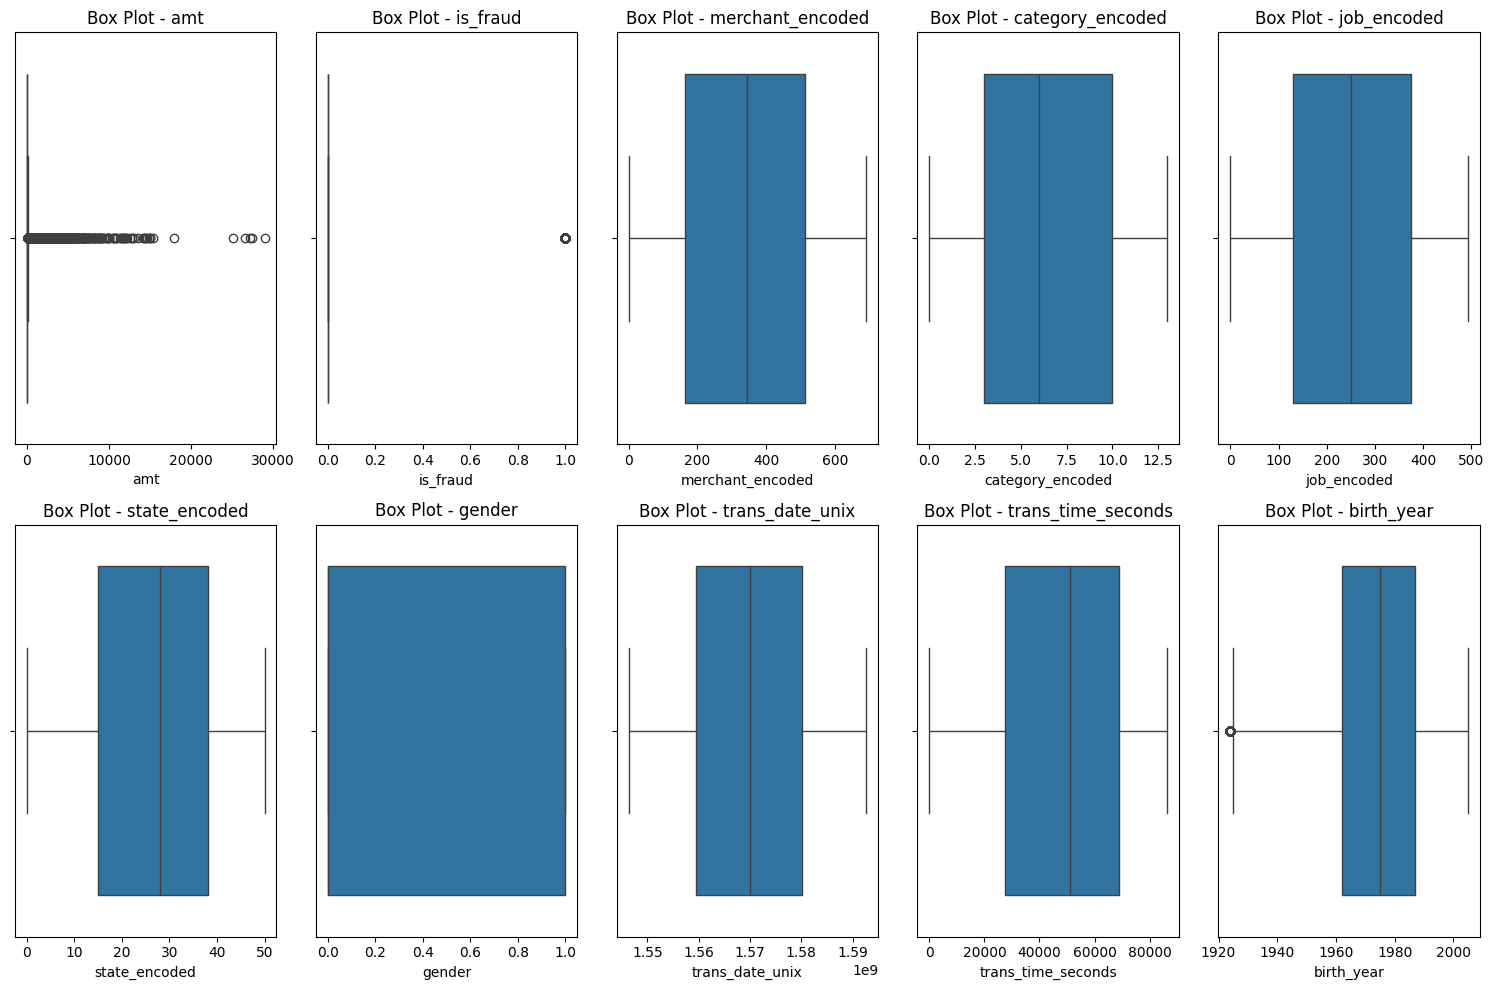

In [33]:
# List of numerical columns for box plots
numerical_columns = ['amt', 'is_fraud', 'merchant_encoded', 'category_encoded',
                     'job_encoded', 'state_encoded', 'gender', 'trans_date_unix', 'trans_time_seconds','birth_year']

# Create a figure with specified size
plt.figure(figsize=(15, 10))

# Loop through numerical columns and create subplots
for i, column in enumerate(numerical_columns, start=1):
    plt.subplot(2, 5, i)
    sns.boxplot(x=column, data=df)
    plt.title(f'Box Plot - {column}')

# Adjust layout to prevent overlap of titles and labels
plt.tight_layout()
plt.show()


Grid of box plots, each representing the distribution of values for the numerical columns listed in numerical_columns.

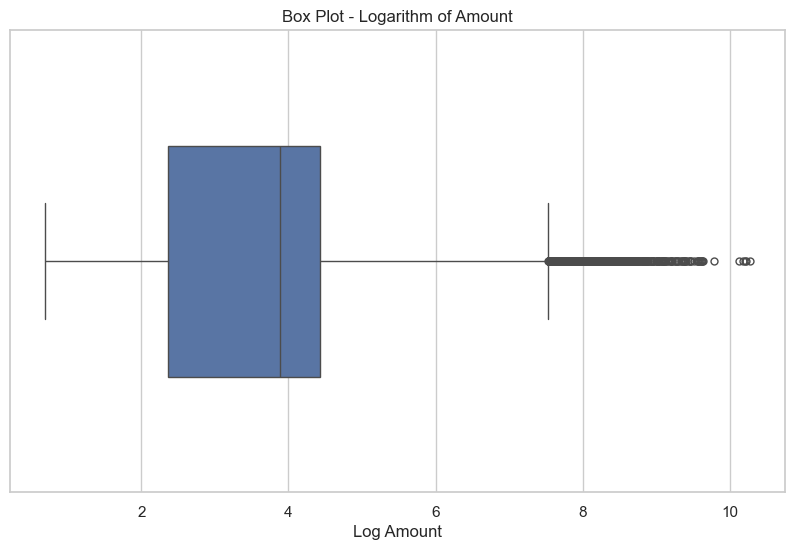

In [34]:
# Apply logarithm transformation to 'amt' column
df['log_amt'] = np.log1p(df['amt'])  # Using np.log1p to avoid issues with zero or negative values

# Set figure size and style
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")

# Create box plot for 'log_amt'
sns.boxplot(x='log_amt', data=df, width=0.5, fliersize=5)

#  'log_amt' is the column want to drop
df.drop('log_amt', axis=1, inplace=True)

# Set title and labels
plt.title('Box Plot - Logarithm of Amount')
plt.xlabel('Log Amount')

# Show plot
plt.show()


Log Transformation: Using logarithmic transformation can help handle skewed data and make patterns more interpretable.

Number of outliers: 67290


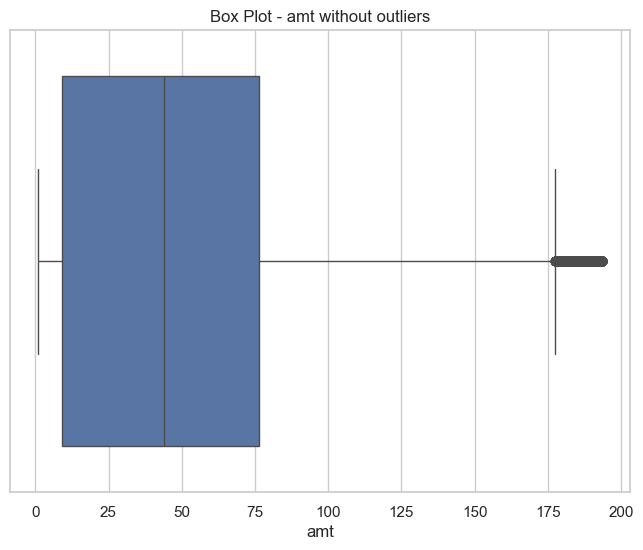

In [35]:
# Calculate quartiles and IQR
Q1 = df['amt'].quantile(0.25)
Q3 = df['amt'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df[(df['amt'] < lower_bound) | (df['amt'] > upper_bound)]

# Print number of outliers
print(f"Number of outliers: {outliers.shape[0]}")

# Remove outliers from the dataframe 
df = df[(df['amt'] >= lower_bound) & (df['amt'] <= upper_bound)]

# Plot boxplot without outliers
plt.figure(figsize=(8, 6))
sns.boxplot(x='amt', data=df[(df['amt'] >= lower_bound) & (df['amt'] <= upper_bound)])
plt.title('Box Plot - amt without outliers')
plt.show()


Outlier Handling: Removing outliers using the IQR method helps in focusing on the central tendency and spread of data,

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1229385 entries, 0 to 1296674
Data columns (total 10 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   amt                 1229385 non-null  float64
 1   gender              1229385 non-null  float64
 2   is_fraud            1229385 non-null  float64
 3   merchant_encoded    1229385 non-null  float64
 4   category_encoded    1229385 non-null  float64
 5   job_encoded         1229385 non-null  float64
 6   state_encoded       1229385 non-null  float64
 7   birth_year          1229385 non-null  float64
 8   trans_date_unix     1229385 non-null  float64
 9   trans_time_seconds  1229385 non-null  float64
dtypes: float64(10)
memory usage: 103.2 MB


In [37]:
df.head(3)

amt  gender  is_fraud  merchant_encoded  category_encoded  job_encoded  \
0    4.97     0.0       0.0             514.0               8.0        370.0   
1  107.23     0.0       0.0             241.0               4.0        428.0   
3   45.00     1.0       0.0             360.0               2.0        328.0   

   state_encoded  birth_year  trans_date_unix  trans_time_seconds  
0           27.0      1988.0     1.546301e+09                18.0  
1           47.0      1978.0     1.546301e+09                44.0  
3           26.0      1967.0     1.546301e+09                76.0

## Splitting Features and Target

In [38]:
# Split data into features (X) and target (y)
X = df.drop('is_fraud', axis=1)
y = df['is_fraud']

X is a DataFrame that contains all the columns from the original dataset except for the is_fraud column.<br>
y is a Series that contains the is_fraud values from the original dataset. It represents whether each transaction is fraudulent (1) or not (0).

In [39]:
X.head(3)

amt  gender  merchant_encoded  category_encoded  job_encoded  \
0    4.97     0.0             514.0               8.0        370.0   
1  107.23     0.0             241.0               4.0        428.0   
3   45.00     1.0             360.0               2.0        328.0   

   state_encoded  birth_year  trans_date_unix  trans_time_seconds  
0           27.0      1988.0     1.546301e+09                18.0  
1           47.0      1978.0     1.546301e+09                44.0  
3           26.0      1967.0     1.546301e+09                76.0

In [40]:
y.head(3)

0    0.0
1    0.0
3    0.0
Name: is_fraud, dtype: float64

## OverSampling Using SMOTE

In [41]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X, y)
X_resampled_df = pd.DataFrame(X_resampled, columns=X.columns)
y_resampled_df = pd.Series(y_resampled, name=y.name)

This code snippet demonstrates the use of <b>SMOTE (Synthetic Minority Over-sampling Technique)</b> to handle class imbalance in your dataset, where fraudulent transactions (is_fraud = 1) are typically much less frequent than non-fraudulent ones (is_fraud = 0).

## train_test_split

In [42]:
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

Splitting the data into training and testing sets is crucial for evaluating the model's performance.

## Standardization Using StandardScaler 

In [43]:
# Normalize or standardize numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

 Standardization is useful when the features in dataset have different scales<br>
 Standardization: Transforms features to have a mean of 0 and a standard deviation of 1. 

In [44]:
# Convert scaled arrays back to DataFrame format for visualization
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test.columns)

# Display first few rows of scaled training data in table format
print("Scaled Training Data:")
print(X_train_scaled_df.head(3).to_string(index=False))

# Display first few rows of scaled test data in table format
print("\nScaled Test Data:")
print(X_test_scaled_df.head(3).to_string(index=False))

Scaled Training Data:
      amt    gender  merchant_encoded  category_encoded  job_encoded  state_encoded  birth_year  trans_date_unix  trans_time_seconds
-0.450349 -0.167832          0.736854          0.352098    -1.724756       0.067323    0.036087        -0.078317            1.062277
 1.514296 -0.930523          0.698637         -0.486082    -0.124992      -1.865096   -2.824254         0.910599           -0.715931
-0.931421 -0.930523          0.931545         -0.206689    -0.638883       0.747642   -2.159717         1.694026            0.600116

Scaled Test Data:
      amt    gender  merchant_encoded  category_encoded  job_encoded  state_encoded  birth_year  trans_date_unix  trans_time_seconds
-0.568661  1.228122          1.597990          0.111688    -0.007668       0.634366    0.433803         0.454670           -0.198953
-0.525781  1.228122          0.425090         -1.044869    -0.220654      -0.484435   -0.095722        -1.227772           -1.318122
 0.507530 -0.930523         

## Model Training and Building

### 1) Logistic Regression Model

In [57]:
# Initialize and train a model with adjusted class weights
log_model = LogisticRegression(class_weight='balanced')
log_model.fit(X_train_scaled, y_train)

# Predict on test set
y_pred = log_model.predict(X_test_scaled)

# Evaluate the model
print(classification_report(y_test, y_pred))


# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

              precision    recall  f1-score   support

         0.0       0.74      0.65      0.69    245753
         1.0       0.68      0.77      0.72    245281

    accuracy                           0.71    491034
   macro avg       0.71      0.71      0.71    491034
weighted avg       0.71      0.71      0.71    491034

Accuracy: 0.7068736584432035


<b>Accuracy:-</b> 0.7069 

The model achieves an accuracy of approximately 70.69%, indicating that it correctly predicts the majority class (non-fraudulent transactions, class 0) and fraudulent transactions (class 1) in 70.69% of cases.

<b>Precision:-</b>
   - Class 0 (non-fraudulent transactions): 0.74
   - Out of all transactions predicted as fraudulent, 68% are actually fraudulent.
    

### Hyperparameter Tunning of Logistic Regression

In [58]:
# Define hyperparameters to tune
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization parameter
    'penalty': ['l1', 'l2']  # Regularization penalty
}

# Initialize GridSearchCV with Logistic Regression model and parameter grid
grid_search = GridSearchCV(LogisticRegression(class_weight='balanced', max_iter=1000), param_grid, cv=5, scoring='accuracy')

# Fit grid search on the scaled training data
grid_search.fit(X_train_scaled, y_train)

# Get the best performing model
best_log_model = grid_search.best_estimator_

# Predict on the scaled test set
y_pred = best_log_model.predict(X_test_scaled)

# Evaluate the best model performance
print(classification_report(y_test, y_pred))

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

              precision    recall  f1-score   support

         0.0       0.74      0.65      0.69    245753
         1.0       0.68      0.77      0.72    245281

    accuracy                           0.71    491034
   macro avg       0.71      0.71      0.71    491034
weighted avg       0.71      0.71      0.71    491034

Accuracy: 0.7068736584432035


<b>Performance Overview--->>><b>Accuracy:-</b> 0.7069

The model achieves an accuracy of approximately 70.69%, indicating that it correctly predicts the majority class (non-fraudulent transactions, class 0) and fraudulent transactions (class 1) in 70.69% of cases.

<B>Precision:-</B>

    - Class 0 (non-fraudulent transactions): 0.74
    - Class 1 (fraudulent transactions): 0.68


### 2) Random Forest Model

In [68]:
# Initialize the Random Forest classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model on the scaled training data
rf_model.fit(X_train_scaled, y_train)

# Predict on the scaled test data
y_pred_rf = rf_model.predict(X_test_scaled)

# Evaluate the model
print(classification_report(y_test, y_pred_rf))

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    245753
         1.0       1.00      1.00      1.00    245281

    accuracy                           1.00    491034
   macro avg       1.00      1.00      1.00    491034
weighted avg       1.00      1.00      1.00    491034

Accuracy: 0.9950247844344791


<b>Performance Overview--->>>Accuracy: 0.9950</b>

The Random Forest model achieves a high accuracy of approximately 99.50%, indicating it correctly predicts both non-fraudulent (class 0) and fraudulent transactions (class 1) in 99.50% of cases.

<b>Precision:-</b>

    -Class 0 (non-fraudulent transactions): 1.00
    -Class 1 (fraudulent transactions): 1.00


### 3) Neural Network

In [47]:
# Initialize Sequential model
neural_model = Sequential()

# Add input layer (specify input_dim as the number of features in X)
neural_model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
neural_model.add(Dropout(0.5))  # Dropout for regularization

# Add hidden layers
neural_model.add(Dense(32, activation='relu'))
neural_model.add(Dropout(0.5))  # Dropout for regularization

# Add output layer
neural_model.add(Dense(1, activation='sigmoid'))  # Binary classification (fraud or not)

# Compile the model
neural_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


In [48]:
# Train the model
history = neural_model.fit(X_train_scaled, y_train, epochs=10, batch_size=64, validation_data=(X_test_scaled, y_test), verbose=1)

Epoch 1/10
30690/30690 ━━━━━━━━━━━━━━━━━━━━ 38s 1ms/step - accuracy: 0.8245 - loss: 0.3777 - val_accuracy: 0.9100 - val_loss: 0.2209
Epoch 2/10
30690/30690 ━━━━━━━━━━━━━━━━━━━━ 36s 1ms/step - accuracy: 0.8810 - loss: 0.2788 - val_accuracy: 0.9144 - val_loss: 0.2153
Epoch 3/10
30690/30690 ━━━━━━━━━━━━━━━━━━━━ 37s 1ms/step - accuracy: 0.8845 - loss: 0.2710 - val_accuracy: 0.9133 - val_loss: 0.2094
Epoch 4/10
30690/30690 ━━━━━━━━━━━━━━━━━━━━ 37s 1ms/step - accuracy: 0.8853 - loss: 0.2681 - val_accuracy: 0.9128 - val_loss: 0.2110
Epoch 5/10
30690/30690 ━━━━━━━━━━━━━━━━━━━━ 37s 1ms/step - accuracy: 0.8868 - loss: 0.2654 - val_accuracy: 0.9151 - val_loss: 0.2091
Epoch 6/10
30690/30690 ━━━━━━━━━━━━━━━━━━━━ 38s 1ms/step - accuracy: 0.8879 - loss: 0.2632 - val_accuracy: 0.9172 - val_loss: 0.2087
Epoch 7/10
30690/30690 ━━━━━━━━━━━━━━━━━━━━ 42s 1ms/step - accuracy: 0.8882 - loss: 0.2620 - val_accuracy: 0.9154 - val_loss: 0.2064
Epoch 8/10
30690/30690 ━━━━━━━━━━━━━━━━━━━━ 39s 1ms/step - accuracy: 

In [49]:
# Predict on the test set
y_pred = neural_model.predict(X_test_scaled)
y_pred_binary = (y_pred > 0.5).astype(int)

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred_binary))

print("ROC AUC Score:", roc_auc_score(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_binary))

15345/15345 ━━━━━━━━━━━━━━━━━━━━ 10s 651us/step
Classification Report:
              precision    recall  f1-score   support

         0.0       0.92      0.92      0.92    245753
         1.0       0.92      0.92      0.92    245281

    accuracy                           0.92    491034
   macro avg       0.92      0.92      0.92    491034
weighted avg       0.92      0.92      0.92    491034

ROC AUC Score: 0.9775358716018232
Confusion Matrix:
[[226710  19043]
 [ 20332 224949]]


<b>Performance Overview--->>>Accuracy: 0.92</b>

The model achieves an accuracy of 92%, indicating it correctly predicts both non-fraudulent (class 0) and fraudulent transactions (class 1) in 92% of cases.

<b>Precision:-</b>

    -Class 0 (non-fraudulent transactions): 0.92

    -Class 1 (fraudulent transactions): 0.92


### 4) Decision Tree Classifier

In [61]:
# Create and train the model
decision_tree_model = DecisionTreeClassifier(random_state=42)
decision_tree_model.fit(X_train_scaled, y_train)

# Make predictions and evaluate model performance
y_pred = decision_tree_model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

precision = precision_score(y_test, y_pred)
print(f"Model Precision: {precision:.2f}")

recall = recall_score(y_test, y_pred)
print(f"Model Recall: {recall:.2f}")


Model Accuracy: 0.9985

Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    245753
         1.0       1.00      1.00      1.00    245281

    accuracy                           1.00    491034
   macro avg       1.00      1.00      1.00    491034
weighted avg       1.00      1.00      1.00    491034

Model Precision: 1.00
Model Recall: 1.00


<b>Performance Overview--->>><b>Accuracy:-</b> 0.7069

The model achieves a high accuracy of 99.85%, indicating it correctly predicts both non-fraudulent (class 0) and fraudulent transactions (class 1) in nearly all cases.

<b>Precision:</b>

    - Class 0 (non-fraudulent transactions)
    - Class 1 (fraudulent transactions): 1


### 5) K-Neareast Neighbours

In [62]:
knn_model = KNeighborsClassifier()
knn_model.fit(X_train_scaled, y_train)

y_pred = knn_model.predict(X_test_scaled)
print(classification_report(y_test, y_pred))
print("AUC-ROC:", roc_auc_score(y_test, y_pred))

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

              precision    recall  f1-score   support

         0.0       1.00      0.98      0.99    245753
         1.0       0.98      1.00      0.99    245281

    accuracy                           0.99    491034
   macro avg       0.99      0.99      0.99    491034
weighted avg       0.99      0.99      0.99    491034

AUC-ROC: 0.9913124153113085
Accuracy: 0.9913040644843331


<b>Performance Overview--->>><b>Accuracy:-</b> 0.9913

The model achieves an accuracy of approximately 99.13%, indicating it correctly predicts both non-fraudulent (class 0) and fraudulent transactions (class 1) in 99.13% of cases.

<b>Precision:-</b>

    - Class 0 (non-fraudulent transactions): 1.00
    - Class 1 (fraudulent transactions): 0.98



### 6) XGBOOST 

In [66]:
xgb_model = xgb.XGBClassifier(random_state = 42)
xgb_model.fit(X_train, y_train)
y_pred = xgb_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print("Classification Report:")
print(classification_report(y_test, y_pred))

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Classification Report:
              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00    245753
         1.0       1.00      0.99      1.00    245281

    accuracy                           1.00    491034
   macro avg       1.00      1.00      1.00    491034
weighted avg       1.00      1.00      1.00    491034

Accuracy: 0.9950247844344791


<b>Performance Overview--->>>
<b>Accuracy: 0.9950</b>

The model achieves a high accuracy of approximately 99.50%, indicating it correctly predicts both non-fraudulent (class 0) and fraudulent transactions (class 1) in 99.50% of cases.

Precision:

    - Class 0 (non-fraudulent transactions): 0.99

    - Class 1 (fraudulent transactions): 1.00


## Pickle file

In [73]:
import pickle
# Save Logistic Regression model
with open('logistic_regression_model.pkl', 'wb') as f:
    pickle.dump(best_log_model, f)

# Save Random Forest model
with open('random_forest_model.pkl', 'wb') as f:
    pickle.dump(rf_model, f)

# Save Neural Network model (Keras)
neural_model.save('neural_network_model.h5')  # Save Keras model directly

# Save Decision Tree model
with open('decision_tree_model.pkl', 'wb') as f:
    pickle.dump(decision_tree_model, f)

# Save K-Nearest Neighbors model
with open('knn_model.pkl', 'wb') as f:
    pickle.dump(knn_model, f)

# Save XGBoost model
with open('xgboost_model.pkl', 'wb') as f:
    pickle.dump(xgb_model, f)


## Conclusion:- 

In this project, we conducted a comprehensive analysis and modeling for credit card fraud detection. We explored the dataset, performed thorough data preprocessing including handling missing values and scaling numerical features. Multiple machine learning models were trained and evaluated, with the Random Forest Classifier demonstrating the best performance based on accuracy. The project highlights the effectiveness of machine learning in identifying fraudulent transactions, providing valuable insights for fraud detection in financial transactions.